In [67]:
import pandas as pd
import numpy as np

In [68]:
data = pd.read_csv("D:/LAP TRINH/DS102.P21.2/LAB_2/data.csv", sep = ';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Normalizing data

In [69]:
def encoder_target(value: str)-> int:
    if value == "Enrolled" or value == "Dropout": #non-graduate
        return 0
    if value == "Graduate": #graduate
        return 1

In [70]:
data['Target'] = data['Target'].apply(encoder_target)

In [71]:
data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,1
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,0
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,1
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,0


In [72]:
#Get continuous
continuous_features = []
for col in data.columns:
    if data[col].dtype == 'float64':
        continuous_features.append(col)

print(len(continuous_features))
continuous_features

7


['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [73]:
normalized_data = data.copy()

for col in continuous_features:
    normalized_data[col] = (normalized_data[col] - normalized_data[col].mean()) / normalized_data[col].std()

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,1
4420,1,1,2,9773,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,0
4421,1,1,1,9500,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,0
4422,1,1,1,9147,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,1


In [74]:
course_dict = {}
i = 0

for id in normalized_data['Course'].unique():
    course_dict.update({id : i})
    i += 1

def convert_coures_id(id: int) -> int:
    return course_dict[id]

normalized_data['Course'] = normalized_data['Course'].apply(convert_coures_id)

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
1,1,15,1,1,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,1
2,1,1,5,2,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,0
3,1,17,2,3,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,1
4,2,39,1,4,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,3,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,1
4420,1,1,2,3,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,0
4421,1,1,1,6,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,0
4422,1,1,1,13,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,1


In [75]:
normalized_data.dtypes 

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

LOGISTIC REGRESSION

In [76]:
from tqdm import tqdm
class LogisticRegression:
    def __init__(self, epoch: int, lr: float) -> None:
        self.lr = lr
        self.epoch = epoch
        self.losses = []
        self.metrics = []
    
    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        z = np.array(z, dtype=float)
        return 1 / (1 + np.exp(-z))
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return np.mean(1-np.abs(y - y_hat))

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n = X.shape[0]
        d = X.shape[1]
        self.theta = np.zeros((d, 1))
        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                #forward
                pb.set_description(f"Epoch: {e+1}")
                y_hat = self.predict(X)
                #backward
                diff = y_hat - y.reshape(-1, 1) # Changed this line to directly reshape y
                gradient = 1/n * np.matmul(X.T, diff)
                self.theta -= self.lr * gradient
                #evaluating
                y_hat = self.predict(X)
                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)
                pb.set_postfix({"loss": loss, "acc": acc})

                self.losses.append(loss)
                self.metrics.append(acc)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        linear_model = np.dot(X, self.theta)
        y_hat = self.sigmoid(linear_model)
        return y_hat

In [77]:
X_Y = normalized_data.to_numpy()

In [78]:
X_Y_train, X_Y_test = np.split(X_Y, indices_or_sections=[int(0.8*data.shape[0])])

X_train = X_Y_train[:,:-1]
Y_train = X_Y_train[:,-1]

X_test = X_Y_test[:,:-1]
Y_test = X_Y_test[:,-1]

In [79]:
X_train.dtype, Y_train.dtype, X_test.dtype, Y_test.dtype

(dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'))

In [80]:
print("X_train shape:", X_train.shape)
print("y_train shape:", Y_train.shape)

X_train shape: (3539, 36)
y_train shape: (3539,)


In [81]:
model = LogisticRegression(epoch=500, lr=0.0001)

In [82]:
model.fit(X_train, Y_train)

Epoch: 500: 100%|██████████| 500/500 [02:37<00:00,  3.18it/s, loss=0.726, acc=0.5]


In [83]:
y_predicted = model.predict(X_test)    
y_predicted

array([[0.62501226],
       [0.37397883],
       [0.53067253],
       [0.37043586],
       [0.55100478],
       [0.35757092],
       [0.58220442],
       [0.6148541 ],
       [0.29116077],
       [0.31341766],
       [0.61291142],
       [0.55242569],
       [0.31931193],
       [0.35811844],
       [0.4147281 ],
       [0.5676389 ],
       [0.46496241],
       [0.44829318],
       [0.2419125 ],
       [0.63009708],
       [0.54738758],
       [0.34007344],
       [0.57708513],
       [0.27227559],
       [0.36091478],
       [0.25703586],
       [0.32467332],
       [0.71068123],
       [0.57915405],
       [0.47216968],
       [0.26233002],
       [0.45775673],
       [0.52754995],
       [0.4192727 ],
       [0.4743213 ],
       [0.65776118],
       [0.58730147],
       [0.44865689],
       [0.33971976],
       [0.36289703],
       [0.64365322],
       [0.36084066],
       [0.55602463],
       [0.31316398],
       [0.53206193],
       [0.42162474],
       [0.35734786],
       [0.410

Epoch: 500: 100%|██████████| 500/500 [02:44<00:00,  3.03it/s, loss=0.726, acc=0.5]


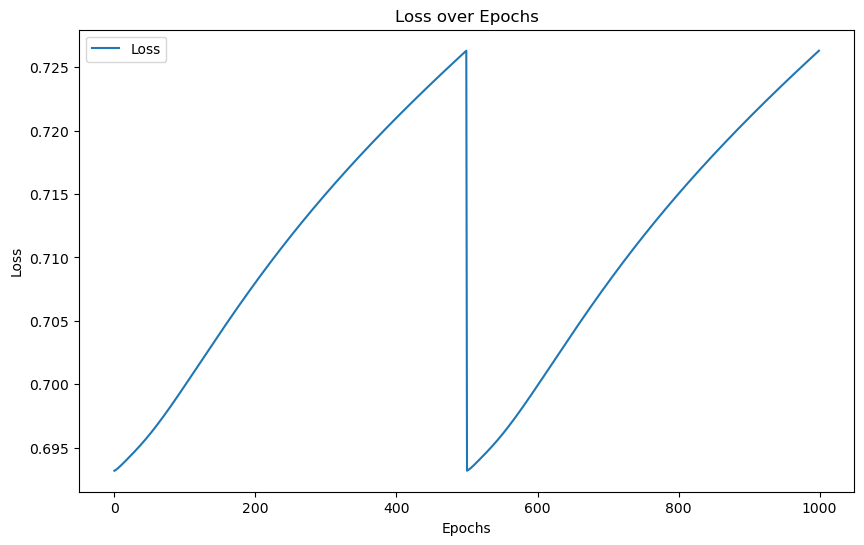

In [84]:
import matplotlib.pyplot as plt

# Huấn luyện mô hình
model.fit(X_train, Y_train)

# Vẽ biểu đồ loss theo epoch
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.losses)),model.losses, label="Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

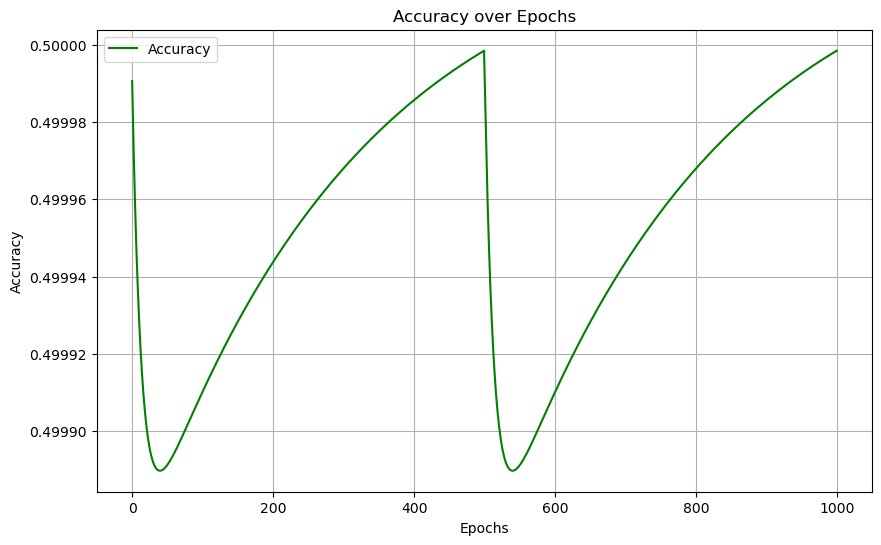

In [85]:
# Vẽ biểu đồ accuracy theo epoch
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.metrics)),model.metrics, label="Accuracy", color="green")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()